# Lab 10: Dimensionality Reduction

In this lab, you will learn gain more experience with ranks and dimensionality reduction and learn how to use it in data science.

## Lab 10.A: SVD Tutorial with Questions (25% of the lab grade)

Let us start by importing two libraries, numpy and matplotlib. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [2]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A)) 

# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)

print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))
print('size of A:')
print(np.shape(A))
print('type of objects u and A:')
print(type(u), type(A))

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1
vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]
rank of matrix A:   
1
size of A:
(5, 4)
type of objects u and A:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [3]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1]])
print('vector u1:  ')
print(u1)
print('vector u2:  ')
print(u2)
v1 = np.transpose([[1,0,2]])
v2 = np.transpose([[0,1,1]])
print('vector v1:   ')
print(v1)
print('vector v2:   ')
print(v2)
A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector v2:   
[[0]
 [1]
 [1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [4]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print(U)
V = np.concatenate((v1,v2), axis = 1)
print(V)
A = np.dot(U,np.transpose(V))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


**Question 1**. Explain why the previous 2 ways of creating the rank-2 matrix end up in exactly the same result. (*Note*: it is very important to understand why, so thake some time to think about it. It is acceptable to work out your explanation on a piece of paper and submit a photo of it as pdf file)

    See separately-submitted pdf file of explanation

**Question 2**. Write a piece of code that generates a rank-3 matrix of dimension 6x5

In [5]:
U= [[8, 3, 0],
    [5, 1, 3],
    [9, 3, 2],
    [6, 9, 7],
    [8, 4, 1],
    [5, 8, 0]]
V= [[8, 7, 2],
    [0, 4, 5],
    [1, 6, 7],
    [2, 3, 9],
    [3, 8, 4]]

A= np.dot(U, np.transpose(V))
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))


[[ 85  12  26  25  48]
 [ 53  19  32  40  35]
 [ 97  22  41  45  59]
 [125  71 109 102 118]
 [ 94  21  39  37  60]
 [ 96  32  53  34  79]]
rank of matrix A:   
3


Here is another way to quickly generate a large low-rank matrix. 

In [6]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))

**Question 3**. 
- What is the size of matrix A?
- What does the command `np.random.rand(2,100)` do?
- What is the rank of A? Why?

A has dimensions 5x100 (5 rows & 100 columns).

That command generates a 2x100 matrix with randomly generated entries.

A has rank 2 because any column of A is equal to a linear combination of the two columns of the left 5x2 matrix (in that matrix multiplication)
and any row of A is equal to a linear combination of the two rows of that right 2x100 random matrix (in that matrix multiplication).




The rank of a zero matrix is always zero.

In [7]:
A = np.zeros((20,4))
print(A)
print(np.linalg.matrix_rank(A))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
0


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ...
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226, 2)


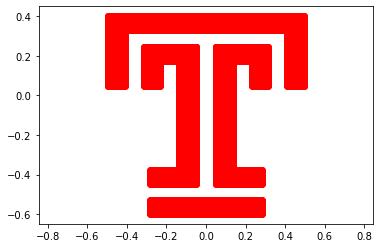

In [8]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print(A)
print('The dimensions of A are: ' , np.shape(A))
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[0.8758675  0.66489531]
 [0.93318997 0.27111336]]


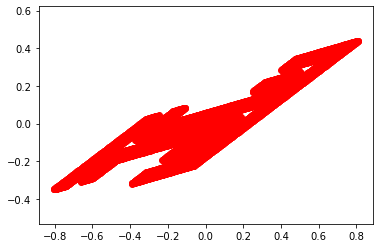

In [9]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 3]]


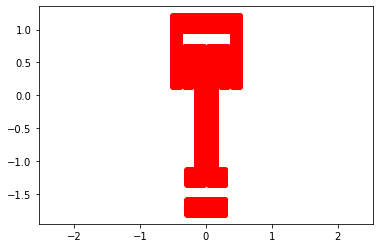

In [10]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.4535961214255773, 0.8912073600614354], [-0.8912073600614354, 0.4535961214255773]]


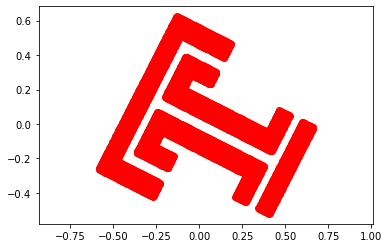

In [11]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

**Question 4**. Create a letter T that is 2 times wider than its original version and then rotated by 145 degrees counterclock-wise.

[[-0.8191520442889919, 0.5735764363510459], [-0.5735764363510459, -0.8191520442889919]]
[[2, 0], [0, 2]]


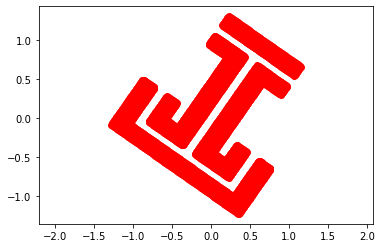

In [12]:
# Generate a "rotation" matrix
angle = 145.0/180*np.pi
size_mult = 2
R = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
T= [[size_mult, 0], [0, size_mult]]
print(R)
print(T)
# Multiply A with R
A2 = np.dot(A,R)
A2 = np.dot(A2, T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226, 100)


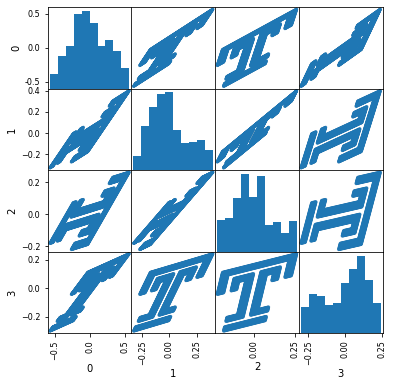

In [13]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print(np.shape(Abig))
# to plot a scatterplot of the first 4 columns... it will take a minute...

pd.plotting.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));

**Question 5**. What is the rank of `Abig` and why?

Abig has rank 2 because any column of Abig can be defined as a linear combination of the two column vectors of A
and any row of Abig can be defined as a linear combination of the two row vectors of T.

Let us perform SVD on matrix `Abig`.

In [19]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print(U.shape, s.shape, V.shape)
print('the first 10 singular values:', s[0:10])

(28226, 100) (100,) (100, 100)
the first 10 singular values: [3.59694814e+02 1.22121290e+02 6.79470242e-14 3.36610357e-14
 3.36610357e-14 3.36610357e-14 3.36610357e-14 3.36610357e-14
 3.36610357e-14 3.36610357e-14]


Let us find a rank-2 approximation of `Abig`

In [20]:
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of Abig:  ', np.linalg.norm(Abig, ord=2))
print('First 10 singular values: ',  s[0:10])
print('Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))


Norm of Abig:   359.694813563705
First 10 singular values:  [3.59694814e+02 1.22121290e+02 6.79470242e-14 3.36610357e-14
 3.36610357e-14 3.36610357e-14 3.36610357e-14 3.36610357e-14
 3.36610357e-14 3.36610357e-14]
Norm of difference Abig-Ak =  2.4028137725158997e-13


**Question 6**.
- Find the Frobenius norm of the difference `Abig - Ak`
- Using SVD find the best rank-1 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.
- Using SVD find the best find rank-3 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.

In [21]:
np.linalg.norm(Abig-Ak, ord="fro")


2.554571229024225e-13

In [22]:
k=1
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

print('2 Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))
print('Frobenius Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord="fro"))

2 Norm of difference Abig-Ak =  122.12128954915535
Frobenius Norm of difference Abig-Ak =  122.1212895491554


The rank-1 approximation of A-big is far worse than the rank-2 approximation. This makes sense, since the 2nd singular value is substantial (~122).


In [23]:
k=3
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

print('2 Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))
print('Frobenius Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord="fro"))

2 Norm of difference Abig-Ak =  2.508942779493166e-13
Frobenius Norm of difference Abig-Ak =  2.6434735929732643e-13


The rank-3 approximation of A-big is actually very slightly worse than the rank-2 approximation.
I'm not sure how that makes sense.

It would make sense for it to be only very slightly better than the rank-2 approximation, since the third singular value is infinitesimal.

Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

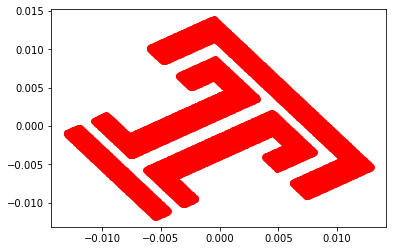

In [24]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [25]:
Abig_noise = Abig + np.random.randn(28226,100)*0.5 

**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

c:\users\ssili\pycharmprojects\cis3715-temple-2020.github.io\venv\lib\site-packages\matplotlib\collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


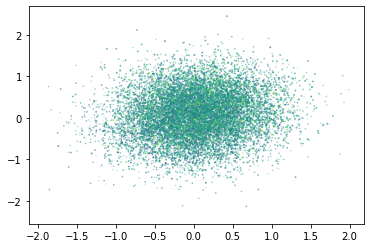

In [27]:
print("scatterplot of the first 4 columns of Abig_noise")
plt.scatter(Abig_noise[:,0],Abig_noise[:,1], Abig_noise[:,2], Abig_noise[:,3], alpha=0.5);

Scatter matrix of the first 5 columns of Abig_noise


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209EC877CC8>,
      dtype=object)

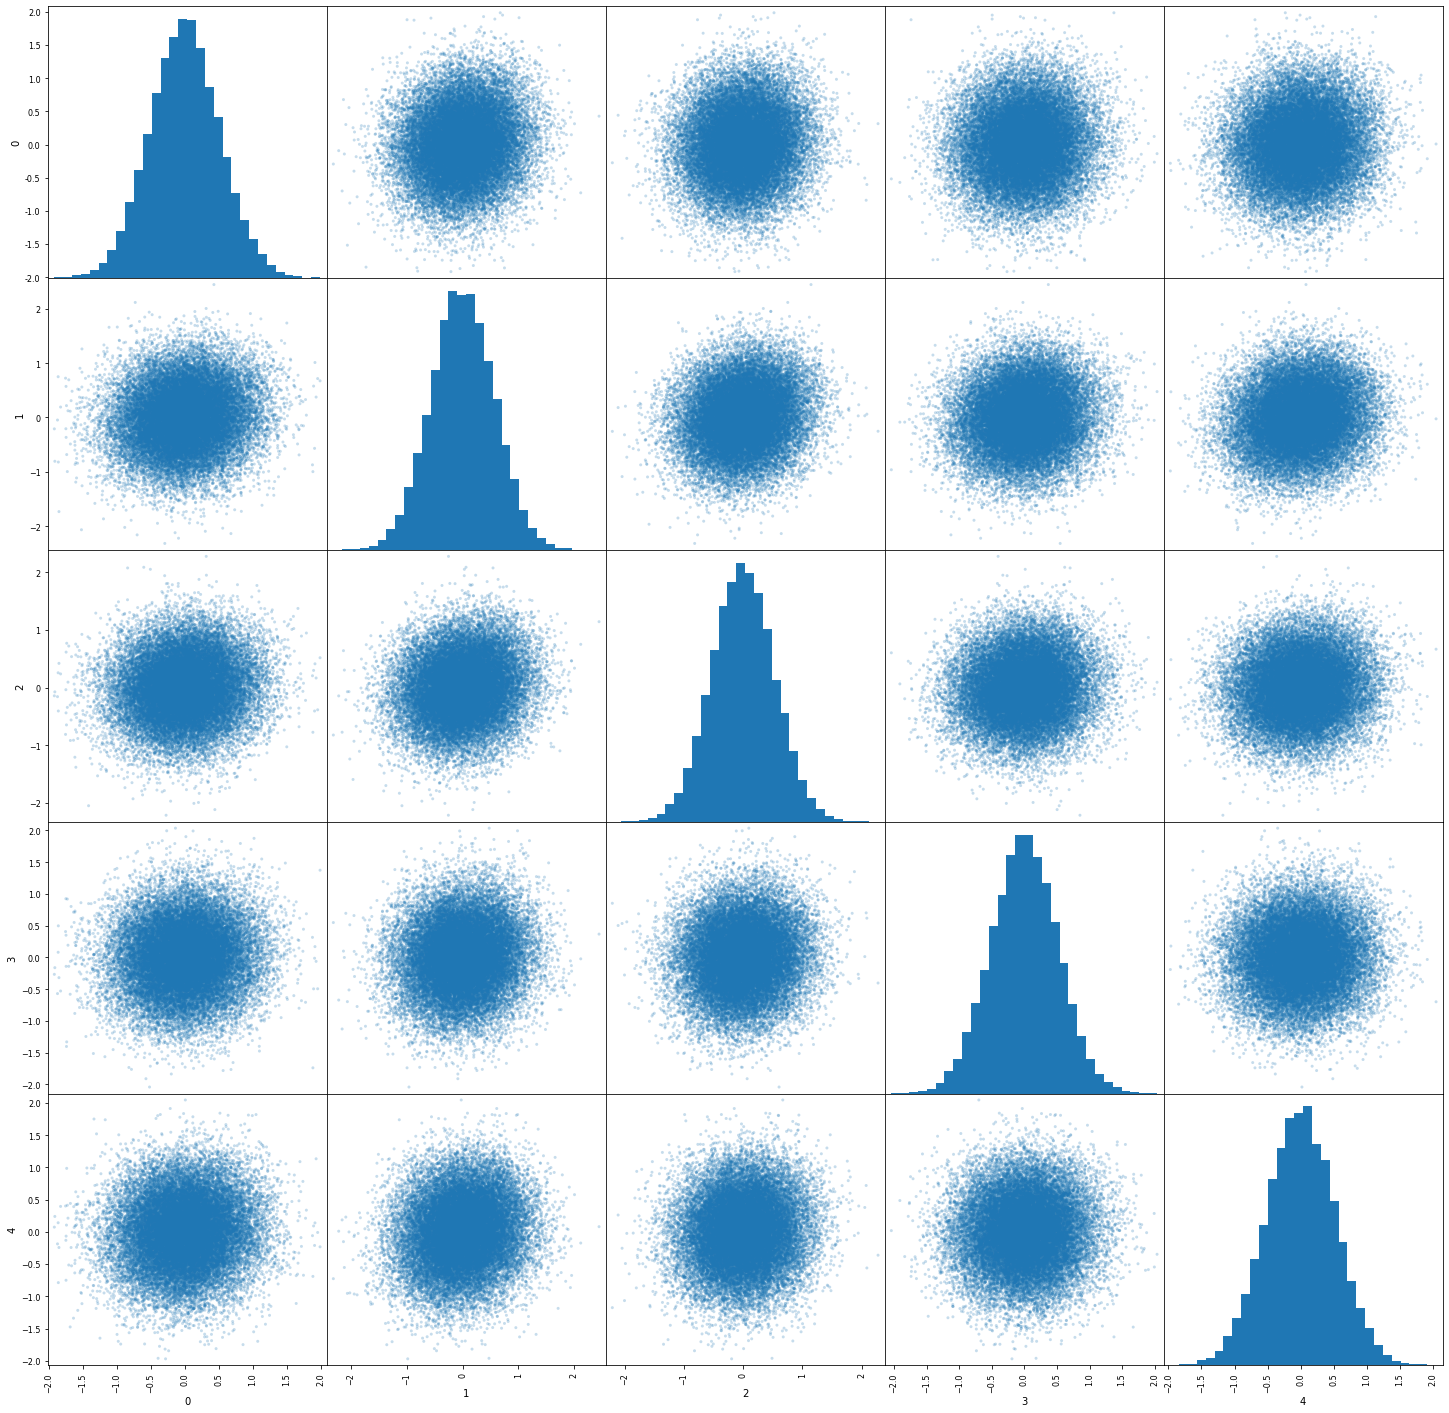

In [29]:
print("Scatter matrix of the first 5 columns of Abig_noise")
bigNoiseDf = pd.DataFrame(Abig_noise[:, 0:5])
pd.plotting.scatter_matrix(bigNoiseDf, alpha=0.25, figsize=(25, 25), hist_kwds={"bins":30})

I really don't see much. The scatterplots all seem to be slightly distorted fuzzy blobs.

In [30]:
U,s,V = np.linalg.svd(Abig_noise,full_matrices=0)
print('the first 10 singular values:', s[0:10])


the first 10 singular values: [368.47070382 148.16126331  88.90722494  88.72564712  88.62306546
  88.29760453  88.10093818  87.98628285  87.78239203  87.68134285]


In [31]:
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of difference Abig_noise-Ak = ', np.linalg.norm(Abig_noise - Ak, ord=2))



Norm of difference Abig_noise-Ak =  88.90722493572912


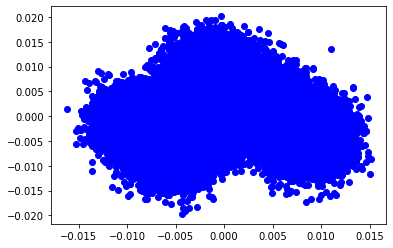

In [32]:
plt.scatter(U[:,0],U[:,1],color='blue');


The low-rank approximation still looks like a fuzzy blob, but it does (barely) manage to resemble a bent/twisted T-shape.
This shows that using dimensionality reduction allowed us to get at some of the patterns which were in the data under/behind the noise.


## Lab 10.B: Apply dimensionality reduction on real data (75% of the lab grade)

In this par tof the lab you will be studying 2 real-life data sets: *Iris* and *Newsgroups*.

### Newsgoups data analysis

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `froupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [ ]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')


**Question 8**. 
- find the counts of each of the 100 words and plot the bar plot of the counts. Which words are the most popular?
- find the counts of the 4 types of articles in the documents. Which type of article is the most popular?

Since the `documents` matrix is huge, we cannot do too much to further explore it. That is why we will try with the SVD.

**Question 9**.
- what is the rank of `documents`?
- perform SVD of documents
- list the first 10 singular values. Plot all 100 singular values. What can we conclude with the respect to low-rank approximation of the matrix?
- let us plot the scatterplot of the first 2 rows of `V`. Use plt.text method to plot the name of each dot (use `wordlist` values) above each dot. Discuss what you see.
- let us plot the scatterplot of the first 2 columns of `U`. Since `U` is to big, you can randomly select 1000 rows to plot. Use 4 colors to render each dot by its group name. Discuss what you see.

The following lines of code will be useful for answering Question 9. Consider reusing them in your study:

In [ ]:
U,s,V=np.linalg.svd(documents,full_matrices=0)
for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=14)
plt.figure()

sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
plt.colorbar(sc)
plt.show()

r=np.random.randint(0,16242,100)
plt.figure()
for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
    plt.text(x,y,groupname,fontsize=14)

c = ['red','green','blue','cyan']
plt.figure()
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),50)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=14)
    print(i)

**Question 10**. 
- transform the document data set by subtracting mean of each column from each corresponding column (scaling to mean zero). Then, repeat question 9. Which results do you like more and why?

**Extra credit (15%)**. 
- Instead of SVD, let us explore a few other approaches for dimensionality. 
- t-sne is a famous method for dimensionality reduction. Read documentation about sklearn.manifold.TSNE and convert the newsgroup data into 2 dimentions. Plot a scatteplot of the resulting data set and discuss how it differs from the SVD result.

**Extra credit (15%)**
- adopt code from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py to our newsgroups data. NNMF and LDA are "topic analysis" algorithms related to SVD. Discuss in few sentences how you can you interpret the results.

### Wine Data Analysis
Download 'Wine' dataset from sklearn (sklearn.datasets.load_wine). This is a famous data set for benchmarking of data science algorithms. Please take a moment to learn about it.

**Question 11**.
- How large is the data set?
- Plot the scatter plot for different pairs of attributes. Do you see any correlations? What are the correlations between the attributes?
- Plot the scatterplot between the first two attributes, but this type use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
- What is the rank of `d`?
- Apply SVD on matrix `d`. 
- Look at the singular values. What do they tell us about the possibility to approximate `d` with a lower rank matrix?
- Plot the scatter plot of the first 2 columns of the `U` matrix (the left singular matrix). Is it easier or more dificult to distinguish between different values of `y`? Please discuss your findings.